## PICMUS beamforming with usbmd toolbox

In [ ]:
# Change the working directory to the root of the project by moving up in the
# directory tree until the file 'setup.py' is found.
import os

while not os.path.exists('setup.py'):
    os.chdir('..')

# Set to True to run the notebook quickly for testing purposes This is done
# automatically in 'tests/test_run_notebooks.py'
quick_mode = True

In [ ]:
# injected parameters
quick_mode = False

In [ ]:
from usbmd.ui import DataLoaderUI, setup
from usbmd.common import set_data_paths

In [ ]:
## load a config file
config = setup(file='./configs/config_picmus_rf.yaml')
config.plot.save = False

Using config file: ./configs/config_picmus_rf.yaml
Git branch and commit: 
feature/test_notebooks=88779e399c6a6998d71a082ff4ab27cbcb3252dc


In [ ]:
## setup data_root through users settings
config.data.user = set_data_paths('./users.yaml', local=config.data.local)
# user_info = {
#     'myusername': {
#         'hostname': {
#             'data_root': 'C:/path_to_my_data_root/'}}
# }
# set_data_paths(user_info)
# or load from yaml file, users.yaml

In [ ]:
# Init GPU / CPU according to config
if config.ml_library == 'torch':
    from usbmd.pytorch_ultrasound.utils.gpu_config import set_gpu_usage
    set_gpu_usage(config.device)
elif config.ml_library == 'tensorflow':
    from usbmd.tensorflow_ultrasound.utils.gpu_config import set_gpu_usage
    set_gpu_usage(config.device)

### PICMUS

### Experiments - resolution distortion

#### RF beamforming

Using torch library for processing
Selected D:\data\ultrasound\PICMUS\database\experiments\resolution_distorsion\resolution_distorsion_expe_dataset_rf.hdf5


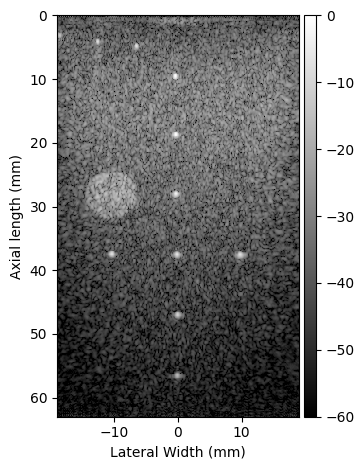

In [ ]:
config.data.file_path = 'PICMUS/database/experiments/resolution_distorsion/resolution_distorsion_expe_dataset_rf.hdf5'
config.data.dataset_name = 'picmus'
config.data.subset = 'experiments/resolution_distorsion'
# The modulation type data is saved in ('rf', 'iq')
config.data.from_modtype = 'rf'
# The modulation type we would like to process the data with
config.data.modtype = 'rf'

# After removing the carrier of the rf signal, we can decimate the data with factor 4
config.scan.downsample = 1

if not quick_mode:
    ui = DataLoaderUI(config)
    image = ui.run()

#### IQ beamforming

Using torch library for processing
Selected D:\data\ultrasound\PICMUS\database\experiments\resolution_distorsion\resolution_distorsion_expe_dataset_iq.hdf5


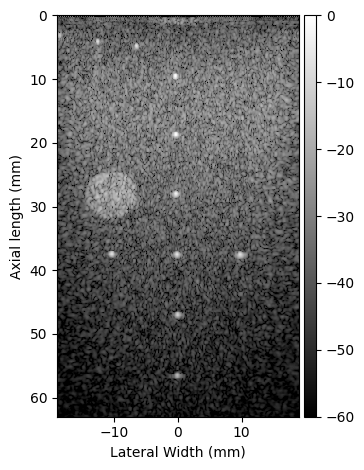

In [ ]:
config.data.file_path = 'PICMUS/database/experiments/resolution_distorsion/resolution_distorsion_expe_dataset_iq.hdf5'
config.data.dataset_name = 'picmus'
config.data.subset = 'experiments/resolution_distorsion'
# The modulation type data is saved in ('rf', 'iq')
config.data.from_modtype = 'iq'
# The modulation type we would like to process the data with
config.data.modtype = 'iq'

if not quick_mode:
    # IQ data is decimated with factor 4
    config.scan.downsample = 4
    sampling_freq_rf = ui.scan.fs
    sampling_freq_iq = ui.scan.fs / config.scan.downsample
    config.scan.fs = sampling_freq_iq
    ui = DataLoaderUI(config)
    image = ui.run()

#### IQ beamforming, but reading RF data

Using torch library for processing
Selected D:\data\ultrasound\PICMUS\database\experiments\resolution_distorsion\resolution_distorsion_expe_dataset_rf.hdf5


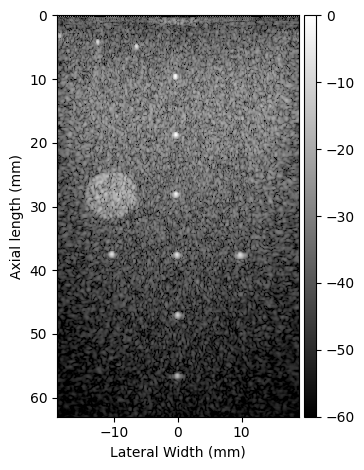

In [ ]:
config.data.file_path = 'PICMUS/database/experiments/resolution_distorsion/resolution_distorsion_expe_dataset_rf.hdf5'
config.data.dataset_name = 'picmus'
config.data.subset = 'experiments/resolution_distorsion'
# The modulation type data is saved in ('rf', 'iq')
config.data.from_modtype = 'rf'
# The modulation type we would like to process the data with <--- this is now changed to IQ
config.data.modtype = 'iq'

if not quick_mode:
    config.scan.downsample = 1
    config.scan.fs = sampling_freq_rf
    ui = DataLoaderUI(config)
    image = ui.run()

#### RF beamforming, but reading IQ data

Using torch library for processing
Selected D:\data\ultrasound\PICMUS\database\experiments\resolution_distorsion\resolution_distorsion_expe_dataset_iq.hdf5


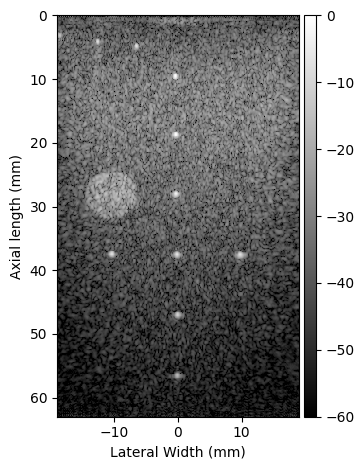

In [ ]:
config.data.file_path = 'PICMUS/database/experiments/resolution_distorsion/resolution_distorsion_expe_dataset_iq.hdf5'
config.data.dataset_name = 'picmus'
config.data.subset = 'experiments/resolution_distorsion'
# The modulation type data is saved in ('rf', 'iq')
config.data.from_modtype = 'iq'
# The modulation type we would like to process the data with <--- this is now changed to IQ
config.data.modtype = 'rf'

if not quick_mode:
    config.scan.downsample = 1
    config.scan.fs = sampling_freq_rf
    ui = DataLoaderUI(config)
    image = ui.run()

### Simulations - resolution distortion

#### RF beamforming

Using torch library for processing
Selected D:\data\ultrasound\PICMUS\database\simulation\resolution_distorsion\resolution_distorsion_simu_dataset_rf.hdf5


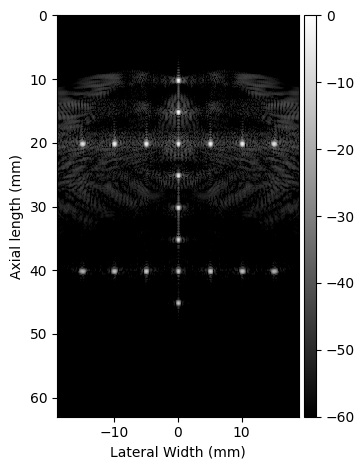

In [ ]:
config.data.file_path = 'PICMUS/database/simulation/resolution_distorsion/resolution_distorsion_simu_dataset_rf.hdf5'
config.data.dataset_name = 'picmus'
config.data.subset = 'simulation/resolution_distorsion'
# The modulation type data is saved in ('rf', 'iq')
config.data.from_modtype = 'rf'
# The modulation type we would like to process the data with
config.data.modtype = 'rf'

if not quick_mode:
    # RF signal is not decimated
    config.scan.downsample = 1
    config.scan.fs = sampling_freq_rf
    ui = DataLoaderUI(config)
    image = ui.run()

#### IQ beamforming

Using torch library for processing
Selected D:\data\ultrasound\PICMUS\database\simulation\resolution_distorsion\resolution_distorsion_simu_dataset_iq.hdf5


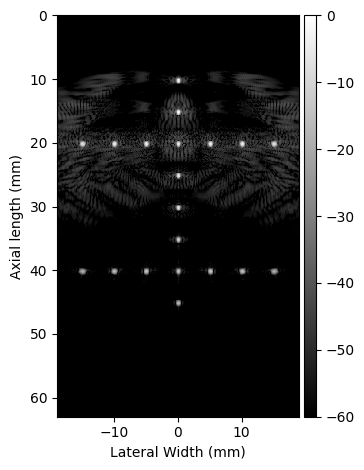

In [ ]:

config.data.file_path = 'PICMUS/database/simulation/resolution_distorsion/resolution_distorsion_simu_dataset_iq.hdf5'
config.data.dataset_name = 'picmus'
config.data.subset = 'simulation/resolution_distorsion'
# The modulation type data is saved in ('rf', 'iq')
config.data.from_modtype = 'iq'
# The modulation type we would like to process the data with
config.data.modtype = 'iq'

if not quick_mode:
    # IQ data is decimated with factor 4
    config.scan.downsample = 4
    config.scan.fs = sampling_freq_iq
    config.scan.N_ax = 1528 
    # 1527 is the number of axial samples in the rf simulation dataset, had to do +1 since that results in number
    # of samples of IQ dataset 328. this is a quirk of the PICMUS dataset
    
    ui = DataLoaderUI(config)
    image = ui.run()